### Mercedes Benz Greener Manufacturing

#### a. import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### b. import data

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.columns)
df.head()

(4209, 378)
Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### c. describe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


i. set ID column to index

In [5]:
# set id column as the index
# make sure id is unique
assert df["ID"].is_unique, "IDs are not unique!" # if no output IDs are unique

# set id as index
df = df.set_index("ID")

In [6]:
df.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ii. remove columns with zero variance and mean

In [7]:
# remove columns with zero variance and mean of 0
zero_var_cols = [c for c in df.columns if df[c].nunique() == 1]
df = df.drop(columns=zero_var_cols)

print("Dropped columns:", zero_var_cols)

Dropped columns: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


iii. check for missing values

In [8]:
df.isnull().sum().sort_values(ascending=False)
# no missing columns

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 365, dtype: int64

#### d. encoding - categorical columns

In [9]:
# there are 8 caetogirical columns
objects = df.select_dtypes(include=['object']).columns
print(f'Categorical columns: {len(objects)}')
print(objects)

Categorical columns: 8
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [10]:
df[objects].nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [11]:
cat_cols = df[objects].columns.tolist()
print(cat_cols)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [12]:
# identify low- and high-cardinality columns
low_cardinality_cols = [c for c in cat_cols if df[c].nunique() < 10]
high_cardinality_cols = [c for c in cat_cols if df[c].nunique() >= 10 and df[c].nunique() <= 50]

print(f"Low-cardinality columns (<10 unique values): {low_cardinality_cols}")
print(f"High-cardinality columns (10-50 unique values): {high_cardinality_cols}")

Low-cardinality columns (<10 unique values): ['X3', 'X4']
High-cardinality columns (10-50 unique values): ['X0', 'X1', 'X2', 'X5', 'X6', 'X8']


In [13]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from category_encoders import TargetEncoder  # For Target Encoding (pip install category_encoders)

# # apply One-Hot Encoding to low-cardinality columns
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# ohe_encoded = pd.DataFrame(
#     ohe.fit_transform(df[low_cardinality_cols]),
#     columns=ohe.get_feature_names_out(low_cardinality_cols),
#     index=df.index
# )
# # target encoding for high-cardinality columns
# te = TargetEncoder(cols=high_cardinality_cols)
# te_encoded = te.fit_transform(df, df['y'])

In [14]:
# ohe_encoded.shape

In [15]:
# # combine OHE columns with the rest of the DataFrame
# te_encoded = te_encoded.drop(columns=low_cardinality_cols)
# df_encoded = pd.concat([te_encoded, ohe_encoded], axis=1)

In [16]:
# df_encoded.shape

In [17]:
# df_encoded.info()

detecting outliers

In [18]:
# df_encoded.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

In [19]:
# from scipy import stats
# import numpy as np

# # Exclude binary columns, including bool columns
# binary_cols = [c for c in df_encoded.columns if df_encoded[c].nunique() == 2 or df[c].dtype == bool]

# # Select continuous numeric columns (non-binary, numeric, with >2 unique values)
# cont_cols = [
#     c for c in df_encoded.columns 
#     if c not in binary_cols 
#     and np.issubdtype(df_encoded[c].dtype, np.number) 
#     and df_encoded[c].nunique() > 2
# ]

In [20]:
# cont_cols_df = df_encoded[cont_cols]

In [21]:
# # if z-score > 3 or < -3, it's an outlier 
# z_scores = np.abs(stats.zscore(df_encoded[cont_cols]))
# outliers = (z_scores > 3).any(axis=1)

# print(f"Outliers detected: {outliers.sum()} rows")

In [22]:
# # cols with outliers:
# cols_with_outliers = [
#     col for col in cont_cols 
#     if (np.abs(stats.zscore(df_encoded[col], nan_policy='omit')) > 3).any()
# ]

# print(f"Columns needing scaling: {cols_with_outliers}")

In [23]:
# from sklearn.preprocessing import RobustScaler, StandardScaler

# # remove 'y' from columns to scale (
# feature_cols_to_scale = [col for col in cols_with_outliers if col != 'y']

# scaler = RobustScaler()
# df_encoded[feature_cols_to_scale] = scaler.fit_transform(df_encoded[feature_cols_to_scale])

#### e. outlier detection and scaling

In [24]:
from scipy import stats
import numpy as np

# Exclude binary columns, including bool columns
binary_cols = [c for c in df.columns if df[c].nunique() == 2 or df[c].dtype == bool]

# Select continuous numeric columns (non-binary, numeric, with >2 unique values)
cont_cols = [
    c for c in df.columns 
    if c not in binary_cols 
    and np.issubdtype(df[c].dtype, np.number) 
    and df[c].nunique() > 2
]
cont_cols_df = df[cont_cols]

> in a gaussian sistribution, data above 3sd is considered an outlier

In [25]:
# if z-score > 3 or < -3, it's an outlier 
z_scores = np.abs(stats.zscore(df[cont_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Outliers detected: {outliers.sum()} rows")

Outliers detected: 40 rows


In [26]:
# cols with outliers:
cols_with_outliers = [
    col for col in cont_cols 
    if (np.abs(stats.zscore(df[col], nan_policy='omit')) > 3).any()
]

print(f"Columns needing scaling: {cols_with_outliers}")

Columns needing scaling: ['y']


In [27]:
# remove 'y' from columns to scale (
feature_cols_to_scale = [col for col in cols_with_outliers if col != 'y']

#### f. preprocessing pipeline

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import TargetEncoder  # for target encoding 
# transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("robust", RobustScaler(), feature_cols_to_scale),
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), low_cardinality_cols),
        ('target_encoding', TargetEncoder(), high_cardinality_cols),
        ("passthrough", "passthrough", binary_cols)  # keep binary as-is
    ]
)

#### g. model pipeline

In [29]:
# model pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#linear regression pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# random forest pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

#### h. train & test

In [30]:
X = df.drop(columns=['y'])
y = df['y']

In [31]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

i. linear regression

In [32]:
# fit model (LR)
lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


ii. random forest

In [33]:
# fit model (RF)
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
# predict (LR)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_train = lr_pipeline.predict(X_train)

In [35]:
# predict (RF)
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Test metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_test = mean_absolute_error(y_test, y_pred_lr)
r2_test = r2_score(y_test, y_pred_lr)

# Print nicely
print("Linear Regression Metrics:")
print(f"Train -> RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  -> RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")

Linear Regression Metrics:
Train -> RMSE: 7.9605, MAE: 5.0649, R²: 0.6088
Test  -> RMSE: 8.3377, MAE: 5.6601, R²: 0.5534


In [37]:
# train metrics
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# test metrics
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# print nicely
print("Random Forest Metrics:")
print(f"Train -> RMSE: {rmse_train_rf:.4f}, MAE: {mae_train_rf:.4f}, R²: {r2_train_rf:.4f}")
print(f"Test  -> RMSE: {rmse_test_rf:.4f}, MAE: {mae_test_rf:.4f}, R²: {r2_test_rf:.4f}")

Random Forest Metrics:
Train -> RMSE: 3.5780, MAE: 2.3079, R²: 0.9210
Test  -> RMSE: 8.9286, MAE: 6.0886, R²: 0.4878


polynomial pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]


# pipeline: poly -> scale -> pca -> ridge
poly_pca_ridge = Pipeline([
    ("preprocessor", preprocessor),             # your encoders/scalers for raw features
    ("pca", PCA(n_components=50, random_state=42)),  # reduce to m components (tune m)
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),               # scale the expanded features
    ("model", RidgeCV(alphas=alphas, cv=5, scoring="r2"))
])

# fit pipeline
poly_pca_ridge.fit(X_train, y_train)

print("Best alpha:", poly_pca_ridge.named_steps["model"].alpha_)
print("Test R²:", poly_pca_ridge.score(X_test, y_test))

Best alpha: 100.0
Test R²: 0.3738582561338456


In [41]:
# predictions
y_pred_train = poly_pca_ridge.predict(X_train)
y_pred_test = poly_pca_ridge.predict(X_test)

In [42]:
# train metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# test metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# print nicely
print("Polynomial + PCA + Ridge Metrics:")
print(f"Train -> RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  -> RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")

Polynomial + PCA + Ridge Metrics:
Train -> RMSE: 6.7039, MAE: 4.5329, R²: 0.7226
Test  -> RMSE: 9.8721, MAE: 6.9966, R²: 0.3739


tuning Linear Regression Model

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# ridge pipeline

ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0, random_state=42))
])

In [ ]:
ridge_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_ridge = ridge_pipeline.predict(X_test)

In [ ]:
# ridge metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#print metrics
print(f"Ridge Metrics:")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")

Ridge Metrics:
RMSE: 8.2337
MAE: 5.5957
R²: 0.5644


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV

# Define alphas to search over
alphas = [0.01, 0.1, 1.0, 10, 100]

ridgecv_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RidgeCV(alphas=alphas, cv=5, scoring="r2"))
])

# Fit pipeline
ridgecv_pipeline.fit(X_train, y_train)

# Best alpha chosen by RidgeCV
print("Best alpha:", ridgecv_pipeline.named_steps["model"].alpha_)

# Evaluate
print("Train R²:", ridgecv_pipeline.score(X_train, y_train))
print("Test R²:", ridgecv_pipeline.score(X_test, y_test))


Best alpha: 100.0
Train R²: 0.5777490902371158
Test R²: 0.5825874810996747


#### i. dimensionality reduction

PCA plus model pipeline

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

# PCA pipeline (LR)
pca_pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", pca),
    ("model", LinearRegression())
])

# PCA pipeline (RF)
pca_pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", pca),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

In [ ]:
# fit PCA pipeline (LR)
pca_pipeline_lr.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# fit PCA pipeline (RF)
pca_pipeline_rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


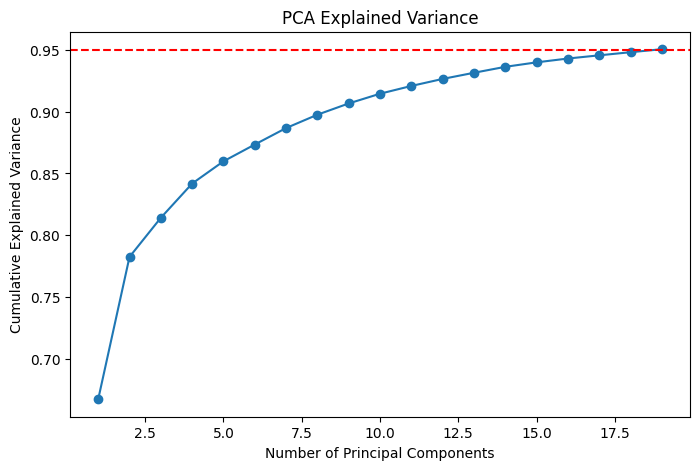

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [ ]:
y_pred_pca_lr = pca_pipeline_lr.predict(X_test)

# metrics (RF)
rmse_pca_lr = np.sqrt(mean_squared_error(y_test, y_pred_pca_lr))
mae_pca_lr = mean_absolute_error(y_test, y_pred_pca_lr)
r2_pca_lr = r2_score(y_test, y_pred_pca_lr)

#print metrics
print(f"RMSE: {rmse_pca_lr:.4f}")
print(f"MAE: {mae_pca_lr:.4f}")
print(f"R²: {r2_pca_lr:.4f}")

RMSE: 8.1917
MAE: 5.6277
R²: 0.5689


In [ ]:
y_pred_pca_rf = pca_pipeline_rf.predict(X_test)

# metrics (RF)
rmse_pca_rf = np.sqrt(mean_squared_error(y_test, y_pred_pca_rf))
mae_pca_rf = mean_absolute_error(y_test, y_pred_pca_rf)
r2_pca_rf = r2_score(y_test, y_pred_pca_rf)

#print metrics
print(f"RMSE: {rmse_pca_rf:.4f}")
print(f"MAE: {mae_pca_rf:.4f}")
print(f"R²: {r2_pca_rf:.4f}")

RMSE: 8.7184
MAE: 5.9899
R²: 0.5117


#### j. submission

In [ ]:
sub_test = pd.read_csv('test.csv')
sub_test = sub_test.set_index("ID")
sub_test.shape

(4209, 376)

In [ ]:
# predict sub_test
y_pred__submission_pca_lr = pca_pipeline_lr.predict(sub_test)

In [ ]:
y_pred__submission_pca_lr

array([ 77.11021959,  94.4071923 ,  77.83876995, ...,  93.22641266,
       110.87585352,  91.53074175], shape=(4209,))

In [ ]:
submission_ids = sub_test.index
submission = pd.DataFrame({
    "ID": submission_ids,
    "y": y_pred__submission_pca_lr
})
submission.to_csv("submission_pca_lr.csv", index=False)